In [1]:
from sippy import *
import numpy as np
import random
import matplotlib.pyplot as plt

import os
import sys

os.chdir("../..")
main_fold = (os.getcwd() + '\\' ).replace('\\','/')
print(main_fold)
sys.path.append(main_fold)

import energym

C:/Users/PSh/Documents/GitLab/best/


In [2]:
env = energym.make("DatacenterThermostat-v0", simulation_days=60)

[OK] The current working directory is %s

[OK] fmiInstantiateSlave: Path to fmuUnzipLocation is not %s.

[OK] fmiInstantiateSlave: Path to fmuUnzipLocation is not %s.

[OK] fmiInstantiateSlave: Path to fmuUnzipLocation is not %s.

[OK] Command executes to copy content of resources folder: %s

[OK] fmiInstantiateSlave: Path to model description file is %s.

[OK] fmiInstantiateSlave: The FMU modelIdentifier is %s.

[OK] fmiInstantiateSlave: The FMU modelGUID is %s.

[OK] fmiInstantiateSlave: Slave %s is instantiated.

[OK] fmiInstantiateSlave: Instantiation of %s succeded.



In [3]:
def arrayToInput(val):
    #print(val)
    inputs = {'Z01_T_Thermostat_sp':[], 'Z02_T_Thermostat_sp':[], 'Bd_Load_CPU':[]}
    
    inputs['Z01_T_Thermostat_sp'].append(val[0])
    inputs['Z02_T_Thermostat_sp'].append(val[1])
    inputs['Bd_Load_CPU'].append(0)
    return inputs

def outputToArray(outputs):
    """return the outputs Z01_T, Z02_T and Fa_Pw_HVAC out of the list of collected outputs"""
    vals = [[],[]]#,[]
    for output in outputs:
        vals[0].append(output['Z01_T'])
        vals[1].append(output['Z02_T'])
        #vals[2].append(output['Fa_Pw_HVAC'])
    return np.array(vals)

In [4]:
increasesp1 = np.linspace(17,20,20)
increasesp2 = np.linspace(20,23,20)
constsp1 = np.linspace(23,23,20)
decreasesp1 = np.linspace(23,20,20)
constsp2 = np.linspace(21,21,20)
decreasesp2 = np.linspace(20,17,20)
constsp3 = np.linspace(17,17,20)
constsp4 = np.linspace(19,19,20)

excitationslist = [increasesp1, increasesp2, decreasesp1, decreasesp2, constsp1, constsp2, constsp4, constsp3]

In [5]:
import random

def sampleData(env, excitationslist, num=50):
    outputs = []
    inputs = []
    temp_data = []
    for _ in range(num):
        excit = random.sample(excitationslist, 1)[0]
        #print(excit)
        inputArray = [[val, val] for val in excit]
        for i in range(len(inputArray)):
            inp = arrayToInput(inputArray[i])
            #print(inp)
            output = env.step(inp)
            outputs.append(output)
            temp_data.append(output['Ext_T'])
        inputs.extend(inputArray)
    outArray = outputToArray(outputs)
    print(temp_data)
    inputs[0].append(temp_data[0])
    for i in range(len(inputs)-1):
        inputs[i+1].append(temp_data[i])
    return np.array(inputs), np.array(outArray)

In [5]:
A = np.array([[0.75213833]])
B = np.array([[-0.00304766, -0.00304766, -0.00013136]])
C = np.array([[-40.9001677],
             [-40.9004308]])
print(np.linalg.pinv(C))
x = np.dot(np.linalg.pinv(C),np.array([17,17]))

[[-0.01222481 -0.01222489]]


In [5]:
def sampleData(env, excitationslist, num=50):
    A = np.array([[0.70270549]])#[[0.82306505]])#[[0.01975256]])#[[0.75213833]])
    B = np.array([[-2.65325975e-03, -2.65325975e-03,  2.46161168e-05]])#[[-1.77618530e-03, -1.77618530e-03, 8.70178708e-05]])#[[-0.02840478, -0.02840478,  0.08858316]])#[[-0.00304766, -0.00304766, -0.00013136]])
    #C = np.array([[-40.9001677],
    #         [-40.9004308]])
    #C = np.array([[-50.02968829],
    #            [-50.02718509]])
    C = np.array([[-56.17658441],
 [-56.17387967]])
    print(np.linalg.pinv(C))
    x = np.dot(np.linalg.pinv(C),np.array([17,17]))
    print(x)
    outputs = []
    inputs = []
    tempData = []
    pwData = []
    modelTempOutputs = []
    #for i in range(int(num/2)):
    #    excit = excitationslist[i%4]
    #    inputArray = [[val, val] for val in excit]
    #    for i in range(len(inputArray)):
    #        inp = arrayToInput(inputArray[i])
    #        if len(tempData) > 0:
    #            inpArr = inputArray[i].copy()
    #            inpArr.append(tempData[-1])
    #            modelInput = np.array(inpArr)
    #        else:
    #            inpArr = inputArray[i].copy()
    #            inpArr.append(3)
    #            modelInput = np.array(inpArr)
    #        x = np.dot(A, x) + np.dot(B, modelInput)
    #        print(f"x {x}")
    #        print(f"outp {np.dot(C, x)[0]}")
    #        modelTempOutputs.append(np.dot(C, x)[0])
    #        output = env.step(inp)
    #        outputs.append(output)
    #        tempData.append(output['Ext_T'])
    #        pwData.append(output['Fa_Pw_HVAC']/1000)
    #    inputs.extend(inputArray)
    for i in range(int(num)):
        excit = excitationslist[i%4+4]
        inputArray = [[val, val] for val in excit]
        for i in range(len(inputArray)):
            inp = arrayToInput(inputArray[i])
            
            inpArr = inputArray[i].copy()
            if len(tempData) == 0:
                inpArr.append(3)
            else:
                inpArr.append(tempData[-1])
            modelInput = np.array(inpArr)
            x = np.dot(A, x) + np.dot(B, modelInput)
            modelTempOutputs.append(np.dot(C, x)[0])
            output = env.step(inp)
            outputs.append(output)
            tempData.append(output['Ext_T'])
            pwData.append(output['Fa_Pw_HVAC']/1000)
        inputs.extend(inputArray)
    for i in range(int(num/2)):
        excit = excitationslist[i%4]
        inputArray = [[val, val] for val in excit]
        for i in range(len(inputArray)):
            inp = arrayToInput(inputArray[i])
            inpArr = inputArray[i].copy()
            inpArr.append(tempData[-1])
            modelInput = np.array(inpArr)
            x = np.dot(A, x) + np.dot(B, modelInput)
            modelTempOutputs.append(np.dot(C, x)[0])
            output = env.step(inp)
            outputs.append(output)
            tempData.append(output['Ext_T'])
            pwData.append(output['Fa_Pw_HVAC']/1000)
        inputs.extend(inputArray)
    for i in range(int(num)):
        excit = excitationslist[-i%4-1]#+4
        inputArray = [[val, val] for val in excit]
        for i in range(len(inputArray)):
            inp = arrayToInput(inputArray[i])
            inpArr = inputArray[i].copy()
            inpArr.append(tempData[-1])
            modelInput = np.array(inpArr)
            x = np.dot(A, x) + np.dot(B, modelInput)
            modelTempOutputs.append(np.dot(C, x)[0])
            output = env.step(inp)
            outputs.append(output)
            tempData.append(output['Ext_T'])
            pwData.append(output['Fa_Pw_HVAC']/1000)
        inputs.extend(inputArray)
    outArray = outputToArray(outputs)
    plt.plot(outArray[0][:500],'b')
    plt.plot(modelTempOutputs[:500], 'r')
    plt.show()
    #print(tempData)
    inputs[0].append(tempData[0])
    for i in range(len(inputs)-1):
        inputs[i+1].append(tempData[i])
    return np.array(inputs), np.array(outArray), np.array(pwData)

[[-0.00890093 -0.00890051]]
[-0.30262447]
[OK] fmiInitializeSlave: The sockfd is %d.

[OK] fmiInitializeSlave: The port number is %d.

[OK] fmiInitializeSlave: This hostname is %s.

[OK] fmiInitializeSlave: TCPServer Server waiting for clients on port: %d.

[OK] fmiInitializeSlave: The number of input variables is %d.

[OK] fmiInitializeSlave: The number of output variables is %d.

[OK] Get input file from resource folder %s.

[OK] Searching for following pattern %s

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Found matching file %s.

[OK] done searching pattern %s

[OK] Get in

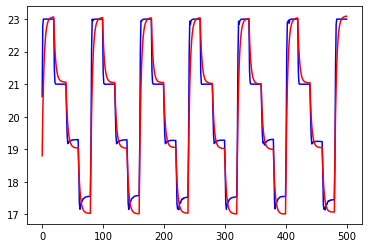

In [6]:
inputs, outputs, pwData = sampleData(env, excitationslist, num=100)

In [8]:
print(outputs[0])

[20.61859443 22.79851062 22.99992429 ... 19.29897841 19.45291117
 19.61046712]


In [9]:
idsystem = system_identification(outputs, inputs, 'N4SID', SS_fixed_order=1)

In [10]:
print(idsystem.C)
print(idsystem.A)
print(idsystem.B)
print(idsystem.D)

[[-56.17658441]
 [-56.17387967]]
[[0.70270549]]
[[-2.65325975e-03 -2.65325975e-03  2.46161168e-05]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [13]:
from sippy import functionsetSIM as fsetSIM

x,y = fsetSIM.SS_lsim_process_form(idsystem.A,idsystem.B,idsystem.C,idsystem.D,inputs.T,np.array([[-0.85,  0.4]]))

[[-2.61549848e+01  5.68233343e-01]
 [-2.61512308e+01  5.73203580e-01]
 [-1.04681974e+04 -6.42146590e+03]]
[[  22.45903045]
 [  22.45782758]
 [6329.38144688]]
[[   21.74873877    20.6760302     20.64900367 ...    18.62770288
     18.58173588    18.53788691]
 [   21.74132311    20.67301255    20.64636225 ...    18.62557107
     18.57961287    18.53576943]
 [14356.21381619  8341.09173247  7840.20883632 ...  6742.335215
   6721.04153614  6704.49435052]]


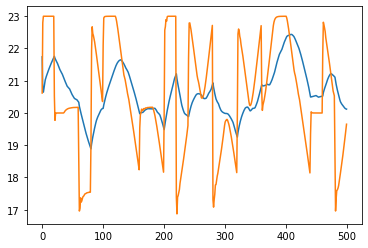

In [15]:
import matplotlib.pyplot as plt
x0 = np.array([[-0.85,0.4]])
print(idsystem.C)
print(np.dot(idsystem.C,x0.T))
print(y)
plt.plot(y[1,:500])
#plt.plot(y[1])
plt.plot(outputs[0,:500])
plt.show()

In [16]:
np.dot(np.linalg.pinv(idsystem.C),np.array([21,21,12000]))
#np.dot(idsystem.C, np.array([-0.77141916,  0.4077478 ]))

array([-0.81475922, -0.54052138])

In [17]:
import control

print(np.linalg.matrix_rank(control.ctrb(idsystem.A, idsystem.B)))

2


In [32]:
env.close()

[OK] fmiTerminateSlave: fmiFreeInstanceSlave must be called to free the FMU instance.

[OK] fmiFreeSlaveInstance: The function fmiFreeSlaveInstance of instance %s is executed.

[OK] freeInstanceResources: %s will be freed.



In [1]:
for i in range(0):
    print(i)